# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | la ronge
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | san antonio de pale
Processing Record 7 of Set 1 | palmares do sul
Processing Record 8 of Set 1 | lycksele
Processing Record 9 of Set 1 | qamdo
Processing Record 10 of Set 1 | san luis de la loma
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | robore
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | qashyr
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | islamk

Processing Record 36 of Set 4 | kulittalai
Processing Record 37 of Set 4 | jayapura
Processing Record 38 of Set 4 | taroa
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | copiague
Processing Record 41 of Set 4 | toga village
City not found. Skipping...
Processing Record 42 of Set 4 | jimma
Processing Record 43 of Set 4 | zouerate
Processing Record 44 of Set 4 | kourou
Processing Record 45 of Set 4 | udomlya
Processing Record 46 of Set 4 | ilheus
Processing Record 47 of Set 4 | smach mean chey
City not found. Skipping...
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | elverum
Processing Record 0 of Set 5 | ahau
City not found. Skipping...
Processing Record 1 of Set 5 | gryazovets
Processing Record 2 of Set 5 | saint-louis
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | nogliki
Processing Record 5 of Set 5 | northam
Processing Record 6 of Set 5 | seaside
Processing Record 7 of Set 5 | magadan
Processing Record 8 of Set 5 | 

Processing Record 26 of Set 8 | ibipeba
Processing Record 27 of Set 8 | nuuk
Processing Record 28 of Set 8 | quibdo
Processing Record 29 of Set 8 | alvaraes
Processing Record 30 of Set 8 | suva
Processing Record 31 of Set 8 | beatrice
Processing Record 32 of Set 8 | tocopilla
Processing Record 33 of Set 8 | itoman
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | gizo
Processing Record 36 of Set 8 | saint-laurent-du-maroni
Processing Record 37 of Set 8 | zwolen
Processing Record 38 of Set 8 | yuzhno-kurilsk
Processing Record 39 of Set 8 | lanciano
Processing Record 40 of Set 8 | tralee
Processing Record 41 of Set 8 | hoemul-li
Processing Record 42 of Set 8 | fort mcmurray
Processing Record 43 of Set 8 | ouellah
City not found. Skipping...
Processing Record 44 of Set 8 | fukuecho
Processing Record 45 of Set 8 | prince george
Processing Record 46 of Set 8 | kuantan
Processing Record 47 of Set 8 | port pirie
Processing Record 48 of Set 8 | hayma'
City not found. Skipp

Processing Record 15 of Set 12 | bonnyville
Processing Record 16 of Set 12 | anqing
Processing Record 17 of Set 12 | shimanovsk
Processing Record 18 of Set 12 | tabas
Processing Record 19 of Set 12 | uturoa
Processing Record 20 of Set 12 | narrabri
Processing Record 21 of Set 12 | rongelap
Processing Record 22 of Set 12 | santiago de cao
Processing Record 23 of Set 12 | rabaul
Processing Record 24 of Set 12 | talcahuano
Processing Record 25 of Set 12 | taguatinga
Processing Record 26 of Set 12 | siwa oasis
Processing Record 27 of Set 12 | santa isabel
Processing Record 28 of Set 12 | sirte
Processing Record 29 of Set 12 | al jubayl
Processing Record 30 of Set 12 | pangkalanbuun
Processing Record 31 of Set 12 | sao felix do xingu
Processing Record 32 of Set 12 | sitia
Processing Record 33 of Set 12 | nyasvizh
Processing Record 34 of Set 12 | kwolla
Processing Record 35 of Set 12 | kargopol'
Processing Record 36 of Set 12 | ulladulla
Processing Record 37 of Set 12 | ma'rib
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.90,91,6,1.34,NZ,1684796883
1,la ronge,55.1001,-105.2842,19.51,44,99,3.24,CA,1684796883
2,mar del plata,-38.0023,-57.5575,16.16,98,100,1.54,AR,1684796883
3,hasaki,35.7333,140.8333,14.56,87,100,7.29,JP,1684796871
4,dunedin,-45.8742,170.5036,11.94,68,100,2.30,NZ,1684796631


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,91,6,1.34,NZ,1684796883
1,la ronge,55.1001,-105.2842,19.51,44,99,3.24,CA,1684796883
2,mar del plata,-38.0023,-57.5575,16.16,98,100,1.54,AR,1684796883
3,hasaki,35.7333,140.8333,14.56,87,100,7.29,JP,1684796871
4,dunedin,-45.8742,170.5036,11.94,68,100,2.30,NZ,1684796631


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

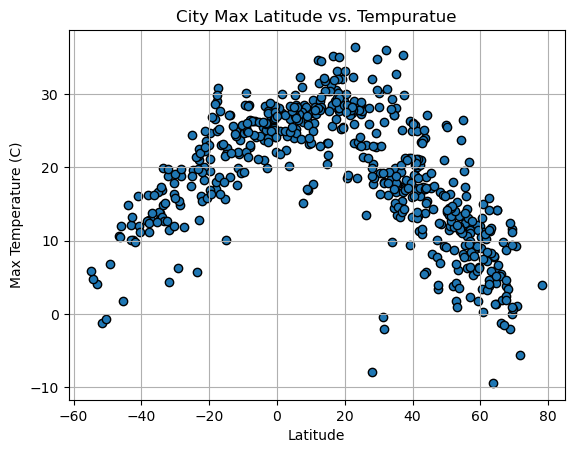

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor='black')


# Incorporate the other graph properties
plt.title('City Max Latitude vs. Tempuratue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

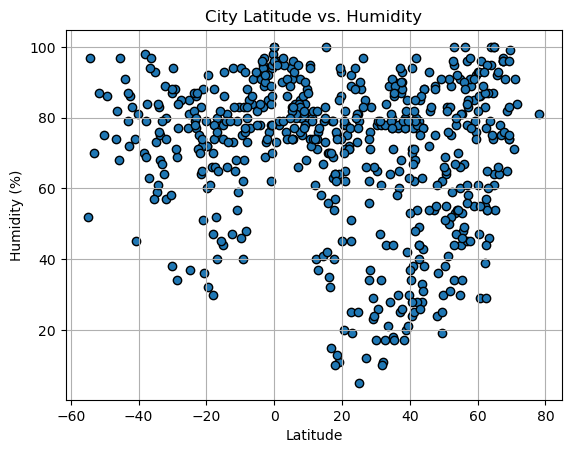

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

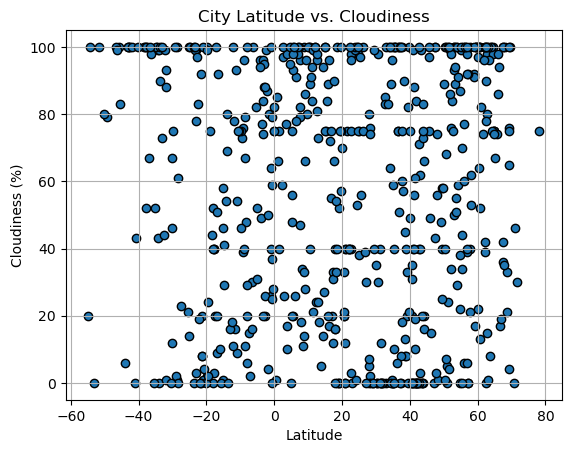

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

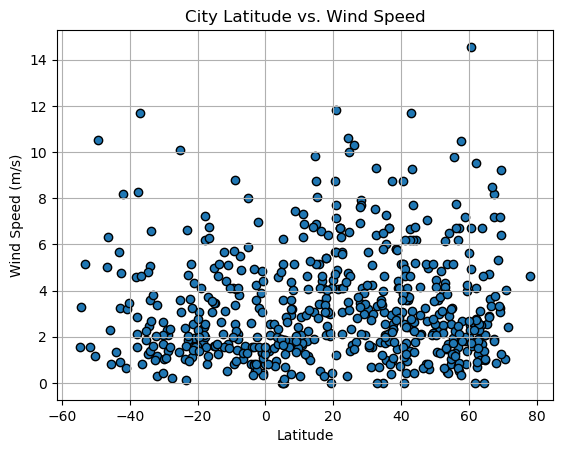

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def regression_graph(Title, X_label, Y_label, X, Y, line_corr):
    slope, intercept, r_value, p_value, std = linregress(X, Y)
    print(f"The r-value is: {r_value}")
    plt.scatter(X, Y, edgecolor='black')
    line = slope * X + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(X, line, color='red')
    plt.annotate(line_eq, line_corr, fontsize=15,color="red")
    plt.title(Title)
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,la ronge,55.1001,-105.2842,19.51,44,99,3.24,CA,1684796883
3,hasaki,35.7333,140.8333,14.56,87,100,7.29,JP,1684796871
7,lycksele,64.5954,18.6735,5.93,87,100,0.00,SE,1684796884
8,qamdo,31.1667,97.2333,-0.39,47,40,0.71,CN,1684796884
9,san luis de la loma,17.2706,-100.8939,30.62,63,33,3.47,MX,1684796884


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,91,6,1.34,NZ,1684796883
2,mar del plata,-38.0023,-57.5575,16.16,98,100,1.54,AR,1684796883
4,dunedin,-45.8742,170.5036,11.94,68,100,2.30,NZ,1684796631
5,san antonio de pale,-1.4014,5.6325,26.19,76,80,3.89,GQ,1684796869
6,palmares do sul,-30.2578,-50.5097,17.83,87,46,1.67,BR,1684796688


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7953114683323116


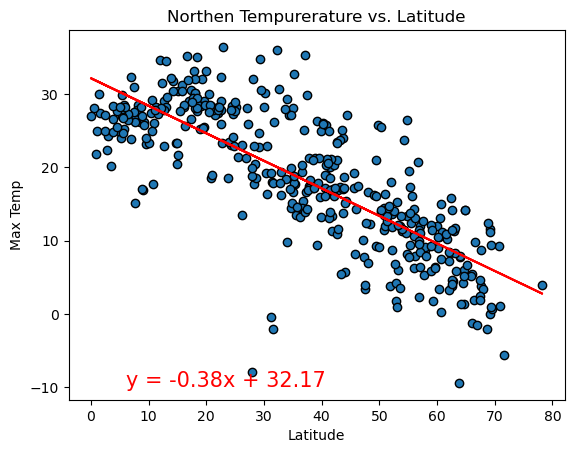

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
Title= 'Northen Tempurerature vs. Latitude'
X= 'Latitude'
Y= 'Max Temp'

regression_graph(Title, X, Y, x_values, y_values, (6,-10))

The r-value is: 0.8299544418006688


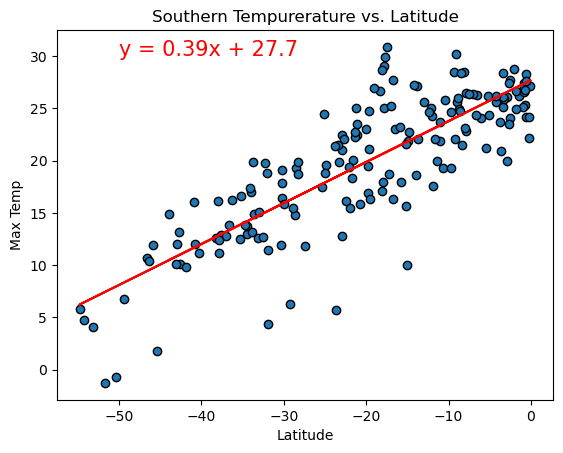

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
Title= 'Southern Tempurerature vs. Latitude'
X= 'Latitude'
Y= 'Max Temp'

regression_graph(Title, X, Y, x_values, y_values, (-50, 30))

**Discussion about the linear relationship:** There is a definite relationship in both these graphs. For both the North and South, as the cities move further from the equator, or Latitude 0, the temperature decreases

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.031475624236160946


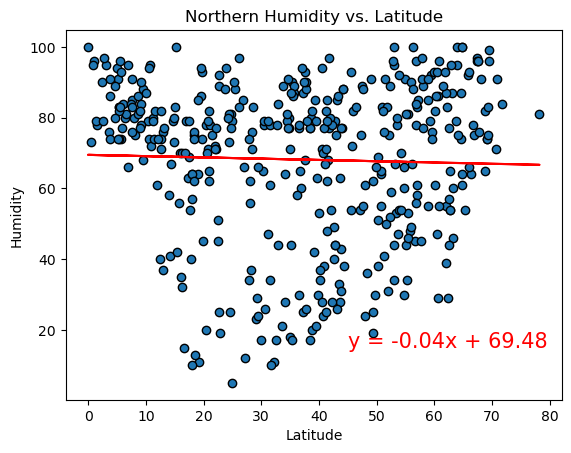

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
Title= 'Northern Humidity vs. Latitude'
X= 'Latitude'
Y= 'Humidity'

regression_graph(Title, X, Y, x_values, y_values, (45, 15))

The r-value is: 0.10746856437892073


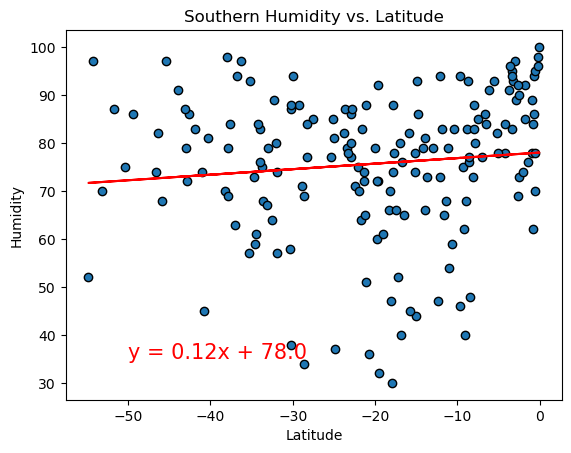

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
Title= 'Southern Humidity vs. Latitude'
X= 'Latitude'
Y= 'Humidity'

regression_graph(Title, X, Y, x_values, y_values, (-50, 35))

**Discussion about the linear relationship:** These graphs show that closer to Latitude 0 the more Humidity can be found in the cities. The North also has much more humidity than in the South graph

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03737808569731659


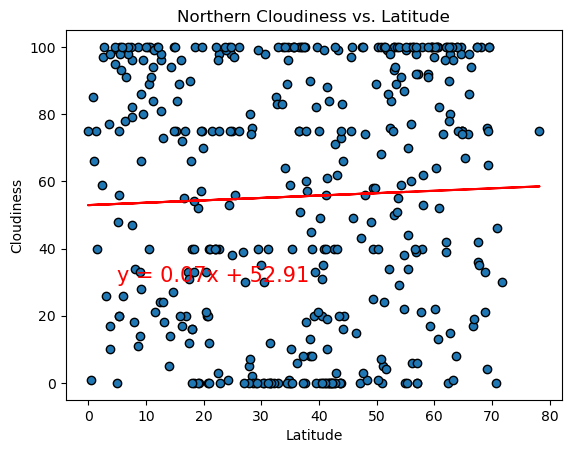

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
Title= 'Northern Cloudiness vs. Latitude'
X= 'Latitude'
Y= 'Cloudiness'

regression_graph(Title, X, Y, x_values, y_values, (5, 30))

The r-value is: -0.17675915117551688


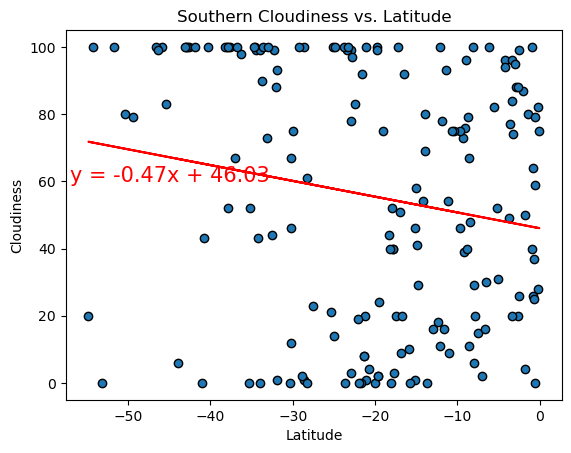

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
Title= 'Southern Cloudiness vs. Latitude'
X= 'Latitude'
Y= 'Cloudiness'

regression_graph(Title, X, Y, x_values, y_values, (-57, 60))

**Discussion about the linear relationship:** There doesn't seem to be any connection between Latitude and Cloudiness in the North. In the South however, it is very clear that as you move further away from Latitude 0 there is much less Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0010467065630017935


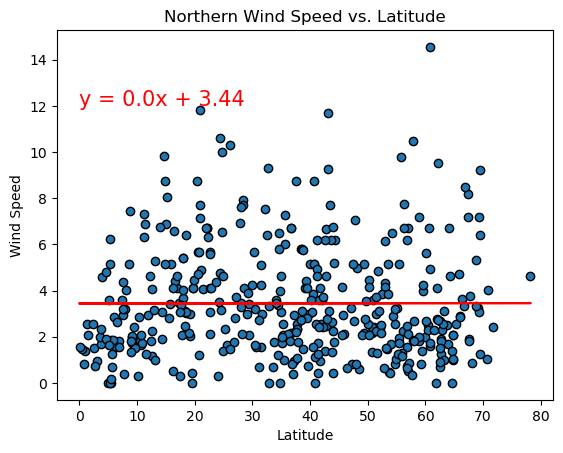

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
Title= 'Northern Wind Speed vs. Latitude'
X= 'Latitude'
Y= 'Wind Speed'

regression_graph(Title, X, Y, x_values, y_values, (0, 12))

The r-value is: -0.13066780734405664


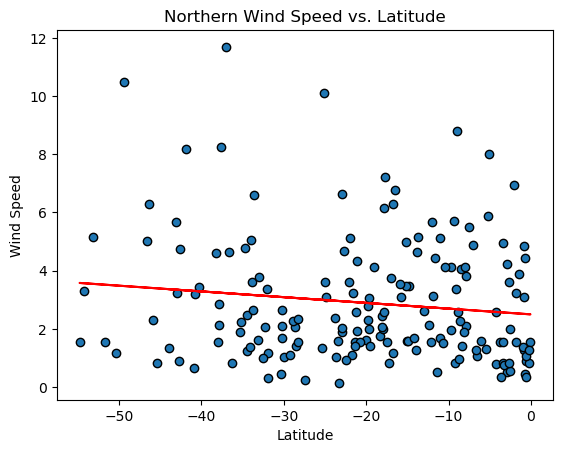

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
Title= 'Northern Wind Speed vs. Latitude'
X= 'Latitude'
Y= 'Wind Speed'

regression_graph(Title, X, Y, x_values, y_values, (-20, 14))

**Discussion about the linear relationship:** These graphs both show that i is much more common to have minimal wind speed in both the North and South and is more rare to have higher wind speeds